['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


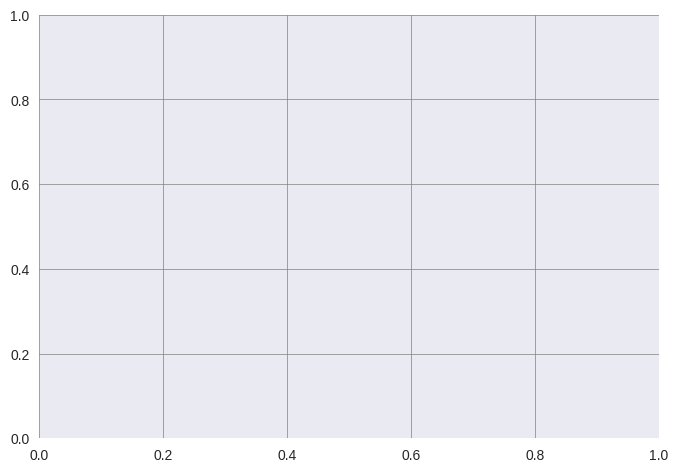

In [50]:
import bainite_boundaries

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import pandas as pd

path=str(bainite_boundaries.PROJECT_ROOT)+'/bainite_boundaries/data/'
results_path=str(bainite_boundaries.PROJECT_ROOT)+'/bainite_boundaries/bainite_boundaries/results/'

import os 
from pathlib import Path
import sys
project_root = os.path.abspath(Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries'))

# Add `bainite_boundaries` to sys.path if it’s not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    

palette = sns.color_palette("deep")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_context("notebook")
sns.set_style('whitegrid')
print(plt.style.available)
# Remove the top and right spines
#sns.despine()
plt.style.use('seaborn-v0_8')
# Optional: Customize gridlines
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
norm = mcolors.Normalize(vmin=0, vmax=1)
from matplotlib.colors import LogNorm
norm=LogNorm(vmin=1, vmax=100)

In [51]:
if False:
    nbins=8
    #Load example data
    data=np.loadtxt(path+'Austenite_input2.txt')
    y=np.loadtxt(path+'Austenite_y2.txt')

    L=y==1
    L1=y==-1
    print(np.sum(L1))

    L2=y==-2
    print(np.sum(L2))

In [52]:


filename = f'{results_path}grid/Bainite_grid_prediction'
results = pd.read_csv(filename+'.csv')

y = results['y_pred'].to_numpy()
L_aust = y==1
L_aust

array([False, False, False, ..., False, False, False])

In [53]:
results

,y_pred,lower_CP,upper_CP,lower_CP_distance,upper_CP_distance
0,3.347842e+02,67.275158,2.276692e+03,43.529465,4.016473e+03
1,1.785323e+05,35164.262054,1.085695e+06,15649.068132,3.355969e+06
2,1.087871e+03,208.500565,7.245365e+03,141.702248,1.291328e+04
3,2.990721e+04,5426.300101,2.431323e+05,2549.324603,7.952531e+05
4,2.097452e+05,43301.706572,1.110432e+06,31234.359505,1.548371e+06
...,...,...,...,...,...
999995,5.616053e+04,10344.059775,4.609524e+05,5154.300583,1.247703e+06
999996,1.217884e+06,236211.703175,9.208014e+06,79901.213547,3.838323e+07
999997,9.150397e+02,164.341145,7.504291e+03,87.218811,1.855108e+04
999998,4.494682e+02,85.337879,3.310679e+03,71.693806,3.963685e+03


In [54]:
np.log10(10800)

np.float64(4.033423755486949)

In [55]:
np.sum(results['lower_CP_distance']>10800)/10000

np.float64(31.9982)

In [56]:
np.sum(results['upper_CP_distance']>10800)/10000

np.float64(91.1618)

In [57]:
which_data = 'Austensite'
# which_data = 'Martensite_start'
# which_data = 'Bainite_start'
which_data = 'Bainite'
# which_data = 'Ferrite'
# which_data = 'Ferrite_critCR'

filename = f'{results_path}grid/{which_data}_grid_prediction'
results = pd.read_csv(filename+'.csv')

y = results['y_pred'].to_numpy()
lower_CP_distance = results['lower_CP_distance'].to_numpy()
lower_CP = results['lower_CP'].to_numpy()

# y = lower_CP

if which_data == 'Austensite':
    L=y==1
elif which_data == 'Bainite':
    y = lower_CP_distance
    # y = lower_CP
    L=y<60*60*3
    
    L = np.logical_and(L, L_aust)
    # L = L_aust
else:
    print('Not implemented')

In [58]:
from bainite_boundaries.utils.load_data import load_dataset

data,y,features=load_dataset('final')
x=data

Loading final data
x shape: (1000000, 9)
y shape: (1000000,)


In [59]:
from bainite_boundaries.utils.data_processing import evaluation_conditions
L_conditions=[]
which_data_list=['Austensite','Bainite_start','Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']
for which_data in which_data_list:
    filename = f'{results_path}grid/{which_data}_grid_prediction'
    results = pd.read_csv(filename+'.csv')
    y = results['y_pred'].to_numpy()
    lower_CP_distance = results['lower_CP_distance'].to_numpy()
    upper_CP_distance = results['upper_CP_distance'].to_numpy()
    #lower_CP_distance = results['lower_CP'].to_numpy()
    #upper_CP_distance = results['upper_CP'].to_numpy()
    #strict,normal,levient
    if which_data=='Bainite':
        lower_CP_distance=lower_CP_distance
    if which_data=='Austensite':
        L_conditions.append([evaluation_conditions(y,x[:,-2],which_data),evaluation_conditions(y,x[:,-2],which_data),evaluation_conditions(y,x[:,-2],which_data)])    
    if which_data in ['Bainite_start']:
        L_conditions.append([evaluation_conditions(lower_CP_distance,x[:,-2:],which_data),evaluation_conditions(y,x[:,-2:],which_data),evaluation_conditions(upper_CP_distance,x[:,-2:],which_data)])      
    if which_data in ['Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']:
        L_conditions.append([evaluation_conditions(upper_CP_distance,x[:,-2:],which_data),evaluation_conditions(y,x[:,-2:],which_data),evaluation_conditions(lower_CP_distance,x[:,-2:],which_data)])  

In [60]:
L_iso=[]
for j in range(3):
    LL=True
    for k in range(len(L_conditions)-1):
        LL=np.logical_and(LL,L_conditions[k][j])
        print(which_data_list[k],np.sum(L_conditions[k][j])/10000)
    print(j,np.sum(LL)/10000)
    L_iso.append(LL)

Austensite 79.621
Bainite_start 24.7945
Martensite_start 73.4998
Bainite 8.8382
Martensite_start_RA 0.4818
0 0.0001
Austensite 79.621
Bainite_start 56.6108
Martensite_start 89.788
Bainite 36.0544
Martensite_start_RA 13.3798
1 2.3601
Austensite 79.621
Bainite_start 79.407
Martensite_start 98.1428
Bainite 68.0018
Martensite_start_RA 42.5239
2 20.3536


In [61]:
for j in range(3):
    LL=True
    for k in [0,-1]:
        LL=np.logical_and(LL,L_conditions[k][j])
        print(which_data_list[k],np.sum(L_conditions[k][j])/10000)
    print(j,np.sum(LL)/10000)
    L_iso.append(LL)

Austensite 79.621
Ferrite_critCR 0.0009
0 0.0009
Austensite 79.621
Ferrite_critCR 71.299
1 60.1477
Austensite 79.621
Ferrite_critCR 99.928
2 79.5514


In [62]:
L_conditions.append(L_iso)

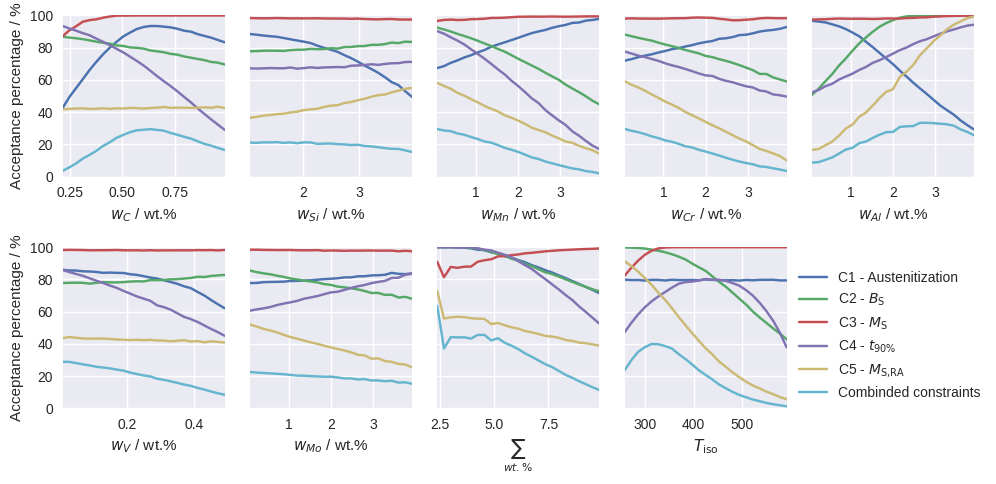

In [63]:
dat=[data[:,k] for k in range(7)]
dat.append(np.sum(data[:,:7],axis=1))
dat.append(data[:,7])
dat.append(data[:,8])
li=[r'$w_C$ / wt.%',r'$w_{Si}$ / wt.%',r'$w_{Mn}$ / wt.%',r'$w_{Cr}$ / wt.%',r'$w_{Al}$ / wt.%',r'$w_{V}$ / wt.%',r'$w_{Mo}$ / wt.%', r'$\sum_{wt.\%}$',r'$T_{\text{iso}}$',r'$\log(\dot{T}_{\text{crit}})$']
fig1,ax1=plt.subplots(2,5,figsize=(10,5))
ax1=ax1.flatten()
label=['C1 - Austenitization',r'C2 - $B_{\text{S}}$',r'C3 - $M_{\text{S}}$',r'C4 - $t_{\text{90\%}}$',r'C5 - $M_{\text{S,RA}}$','',r'Combinded constraints']
for kk in [0,1,2,3,4,6]:
    L=L_conditions[kk][2]
    nbins=25
    for k in range(9):

        H,bins =np.histogram(dat[k],bins=nbins)
        H1,_ =np.histogram(dat[k][L.flatten()],bins=nbins)

        HH=H1/H*100
        xx=bins[:-1]/2+bins[1:]/2
        ax1[k].plot(xx,HH,label=label[kk])
        ax1[k].set_ylim([0,100])
        ax1[k].set_xlabel(li[k])
        ax1[k].set_xlim([np.min(xx),np.max(xx)])
    
vmin=np.array([0.2,1,0,0,0,0,0,250,-1])
vmax=np.array([1,4,4,4,4,0.5,4,600,float(np.log10(25))])
for k in range(9):
    if np.mod(k,5)!=0:
        ax1[k].tick_params(axis='y', labelleft=False) 
    else:
        ax1[k].set_ylabel('Acceptance percentage / %')

ax1[9].remove()
fig1.tight_layout()
ax1[k].legend( bbox_to_anchor=(1, 0.93))
plt.savefig('D1.png', dpi=300, bbox_inches='tight')


In [64]:
HH

array([23.58675937, 29.97059996, 35.07130348, 37.9994426 , 39.99751984,
       39.81222533, 38.70903377, 37.18003467, 33.76917713, 30.69123964,
       27.28704259, 23.70218408, 20.79680087, 18.0025493 , 14.83430167,
       12.50626441, 10.24711288,  8.36927089,  6.93388678,  5.5115166 ,
        4.50718427,  3.42568514,  2.61572447,  1.9918246 ,  1.32397192])

[np.float64(1.0), np.float64(4.0)]
[np.float64(0.0), np.float64(4.0)]
[np.float64(0.0), np.float64(4.0)]
[np.float64(0.0), np.float64(4.0)]
[np.float64(0.0), np.float64(0.5)]
[np.float64(0.0), np.float64(4.0)]
[np.float64(2.2), np.float64(10.0)]
[np.float64(250.0), np.float64(600.0)]


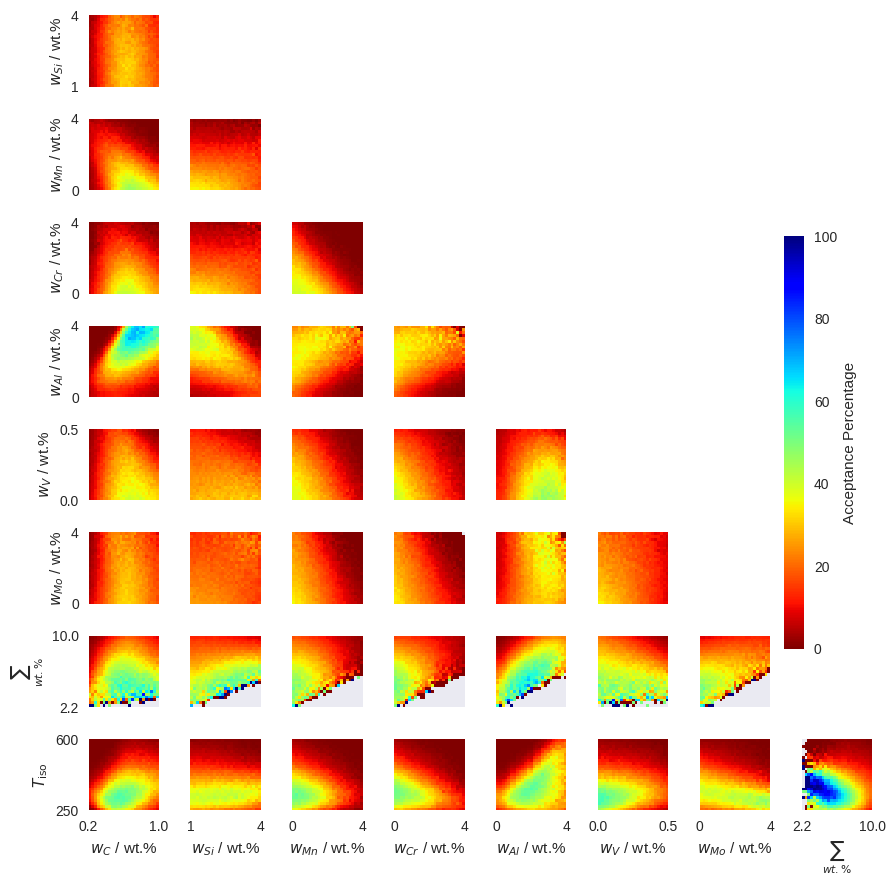

In [66]:
axs=[]
fig, ax= plt.subplots(9,9,figsize=(10,10))
#fig.subplots_adjust(wspace=3, hspace=3)
L=L_iso[2]
nbins=25
norm = mcolors.Normalize(vmin=0, vmax=100)
#norm=LogNorm(vmin=1, vmax=100)
for k in range(9):
    for j in range(9): 
        ax[k,j].grid(False) 
        
        if k>j:
            
            H, yedges, xedges =np.histogram2d(dat[k],dat[j],bins=nbins)
            H1, _, _ =np.histogram2d(dat[k][L.flatten()],dat[j][L.flatten()],bins=nbins)

            HH=H1/(H)*100+1e-4
            HH[np.isnan(HH)]
            im=ax[k,j].pcolormesh(xedges, yedges, HH,cmap='jet_r',norm=norm)
            ax[k,j].set_aspect('auto')
            #fig.colorbar(cf, ax=ax[k,j])
            axs.append(ax[k,j])
            #ax[k,j].set_ylim([float(np.round(np.min(dat[k]),1)),float(np.round(np.max(dat[k]),1))])
            if k!=8:
                ax[k,j].set_xticklabels([])

            if j!=0:
                ax[k,j].set_yticklabels([])


            if k==8:
                ax[k,j].set_xlabel(li[j])
                ax[k,j].set_xticks([float(np.round(np.min(dat[j]),1)),float(np.round(np.max(dat[j]),1))])

            if j==0:
                ax[k,j].set_ylabel(li[k])
                print([np.round(np.min(dat[k]),1),np.round(np.max(dat[k]),1)])
                ax[k,j].set_yticks([float(np.round(np.min(dat[k]),1)),float(np.round(np.max(dat[k]),1))])
 




        else:
            ax[k,j].remove()


cbar=fig.colorbar(im,ax=axs, orientation='vertical',fraction=0.03)

cbar.set_label('Acceptance Percentage')
fig.tight_layout()

fig.tight_layout()
plt.savefig('final_prediction.png', dpi=300, bbox_inches='tight')
# fig.tight_layout()